#### Evaluation Project - 5

## Census Income Project

##### Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

#### Description of fnlwgt (final weight)

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [1]:
# Importing required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the datafiles and loading the datasets,trying to understand the data.

df=pd.read_csv('census_income.csv') 
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
#knowing the shape of the datasets
df.shape

(32560, 15)

They are 32560 rows and 15 columns is their in the dataset

In [6]:
#finding the datatypes of each of the columns.
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

#### Key observation :

- 6 integer and 9 object variable present in dataset.
- No categorical value present in dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
# Checking any null value present in dataset

df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

No null values are present in the dataset.

## Exploratory Data Analysis (EDA)

In [9]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### Key observations:
- Capital_gain and Capital_loss have min values 0 and 25%, 50% and 75% values are Zeros.

#### Data Visualization
To check missing values

<AxesSubplot:>

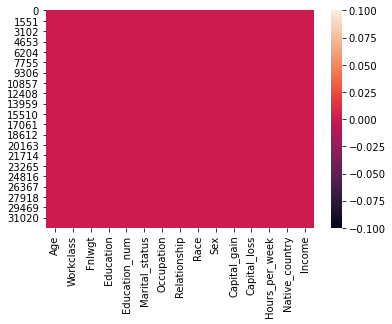

In [10]:
sns.heatmap(df.isnull())

Using Visualizing data plot to re-check null value and heatmap plot is showing their is no null value present in the dataset

### Checking for ? values in dataset

In [11]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

##### Replacing ? values with Mode of the object columns

In [12]:
for col in ['Workclass', 'Occupation', 'Native_country']:
    df[col]=df[col].replace(' ?', df[col].mode()[0])

##### Getting the list of int64 columns in int_list

In [13]:
int_list=list(df.select_dtypes(['int64']).columns)

### Plotting outliers

In [14]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

#### Univariate analysis

Text(0.5, 1.0, 'Income <=50k or >50k')

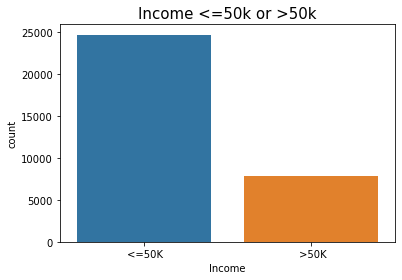

In [15]:
sns.countplot(x="Income", data=df) 
plt.title("Income <=50k or >50k", fontsize = 15)

We can see that people who earned less than or equal to 50k have more number than people who earned more than 50k

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

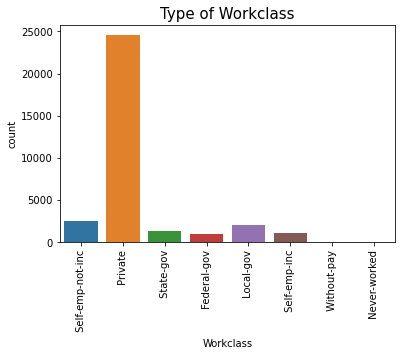

In [16]:
sns.countplot(x="Workclass", data=df)
plt.title("Type of Workclass", fontsize = 15)
plt.xticks(rotation=90)

We can see that private Employee participated more.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

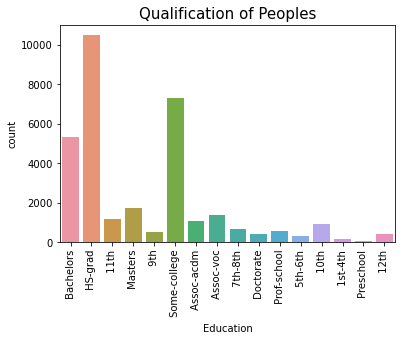

In [17]:
sns.countplot(x="Education", data=df)
plt.title("Qualification of Peoples", fontsize = 15)
plt.xticks(rotation=90)

We can see that the person who did HS-Grad is earning more than others.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

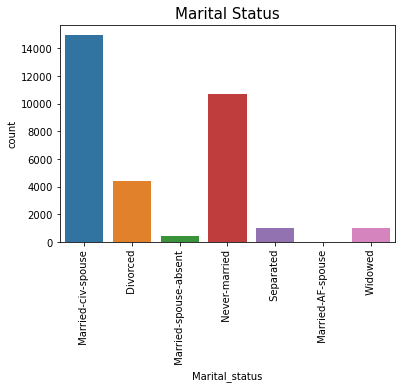

In [18]:
sns.countplot(x="Marital_status", data=df)
plt.title("Marital Status", fontsize = 15)
plt.xticks(rotation=90)

We can see that married-civ-spouse have more income than others.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

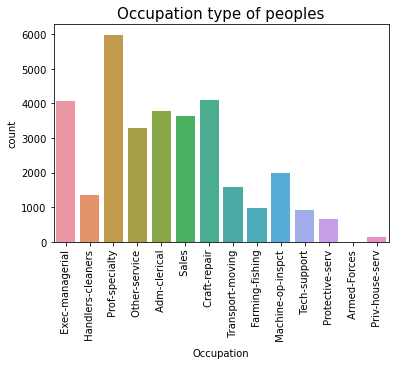

In [19]:
sns.countplot(x="Occupation", data=df)
plt.title("Occupation type of peoples", fontsize = 15)
plt.xticks(rotation=90)

We can see that people who's occupation is Prof-specialty have more number than others Occupation peoples.

Text(0.5, 1.0, 'Relationship type')

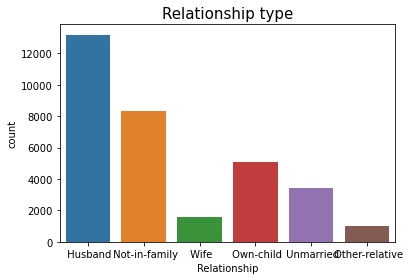

In [20]:
sns.countplot(x="Relationship", data=df)
plt.title("Relationship type", fontsize = 15)

We can see that husband are earning more than any other person of family.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

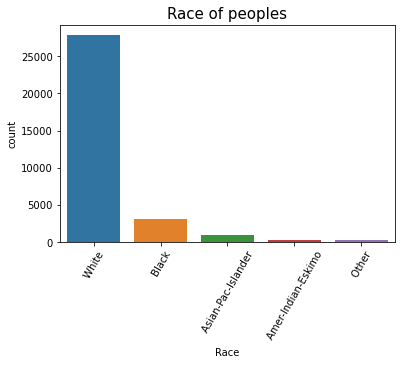

In [21]:
sns.countplot(x="Race", data=df)
plt.title("Race of peoples", fontsize = 15)
plt.xticks(rotation=60)

We can see that white peoples have more earning than other race of peoples.

Text(0.5, 1.0, 'Male vs Female')

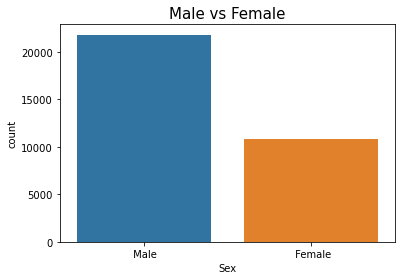

In [22]:
sns.countplot(x="Sex", data=df)
plt.title("Male vs Female", fontsize = 15)

We can see that male earning more than female.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' Mexico'),
  Text(5, 0, ' South'),
  Text(6, 0, ' Puerto-Rico'),
  Text(7, 0, ' Honduras'),
  Text(8, 0, ' England'),
  Text(9, 0, ' Canada'),
  Text(10, 0, ' Germany'),
  Text(11, 0, ' Iran'),
  Text(12, 0, ' Philippines'),
  Text(13, 0, ' Italy'),
  Text(14, 0, ' Poland'),
  Text(15, 0, ' Columbia'),
  Text(16, 0, ' Cambodia'),
  Text(17, 0, ' Thailand'),
  Text(18, 0, ' Ecuador'),
  Text(19, 0, ' Laos'),
  Text(20, 0, ' Taiwan'),
  Text(21, 0, ' Haiti'),
  Text(22, 0, ' Portugal'),
  Text(23, 0, ' Dominican-Republic'),
  Text(24, 0, ' El-Salvador'),
  Text(25, 0, ' France'),
  Text(26, 0, ' Guatemala'),
  Text(27, 0, ' China'),
  Text(28, 0, ' Japan'),
  Text(29, 0, ' Yugoslavia'

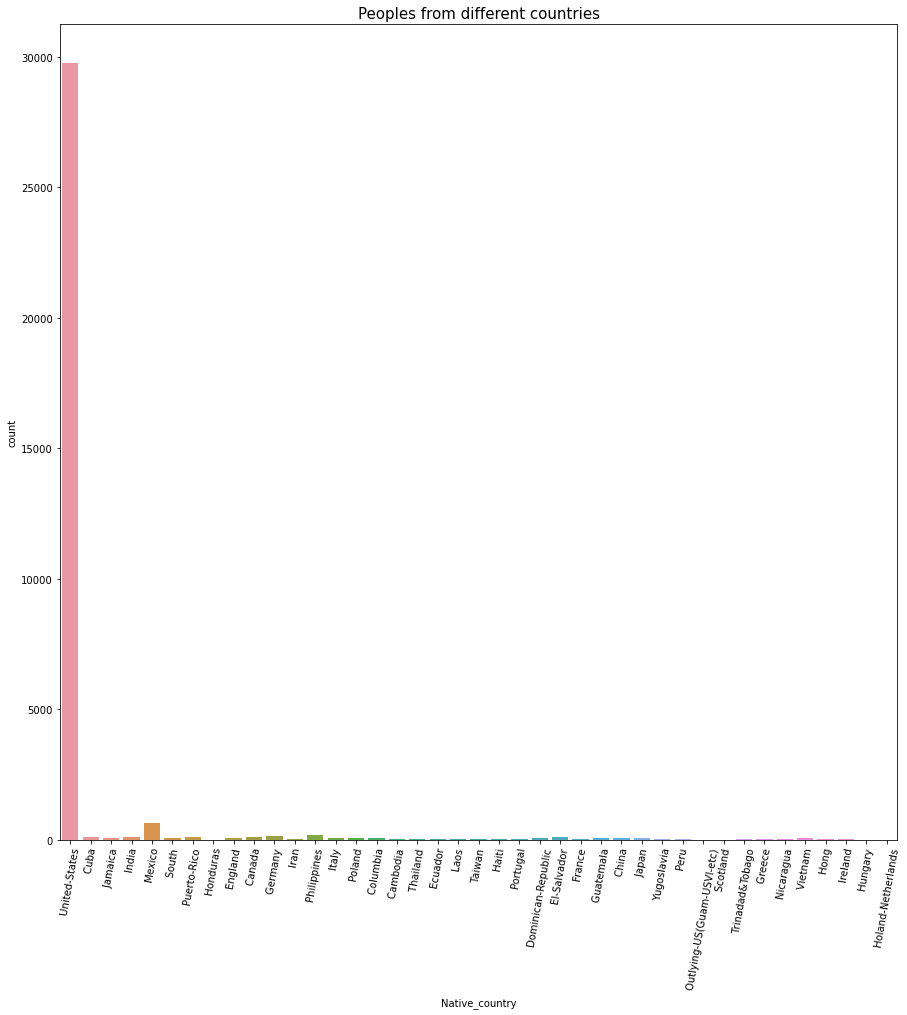

In [23]:
plt.figure(figsize = (15,15))
sns.countplot(x="Native_country", data=df)
plt.title("Peoples from different countries", fontsize = 15)
plt.xticks(rotation=80)

We can see that from United-States peoples are earning more than other country peoples.

#### Bivariant Analysis

<AxesSubplot:xlabel='Income', ylabel='Age'>

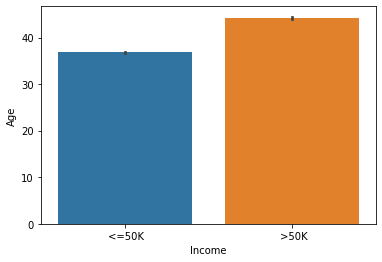

In [24]:
sns.barplot(x = 'Income', y = 'Age', data = df)

People who have age less than 40 are earning less than 50k and people who have age more than 40 are earning more than 50k

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

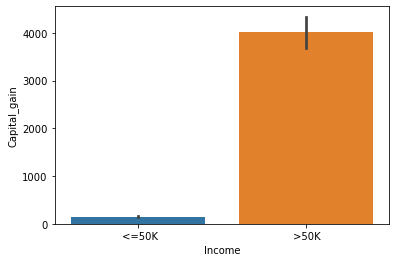

In [25]:
sns.barplot(x = 'Income', y = 'Capital_gain', data = df)

<AxesSubplot:xlabel='Income', ylabel='Education_num'>

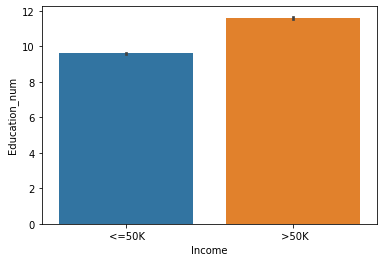

In [26]:
sns.barplot(x = 'Income', y = 'Education_num', data = df)

If Education num is less than 10 than income is less than 50k, If Education num is more than 11 than income will be more than 50k.

<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

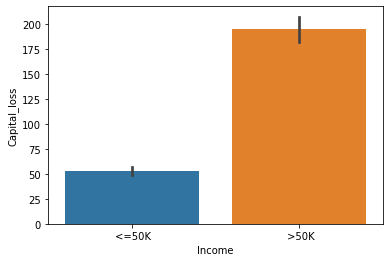

In [27]:
sns.barplot(x = 'Income', y = 'Capital_loss', data = df)

If Capital Loss is 50, income will be less than 50k and If Capital loss is more than 175, income will be more than 50k

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

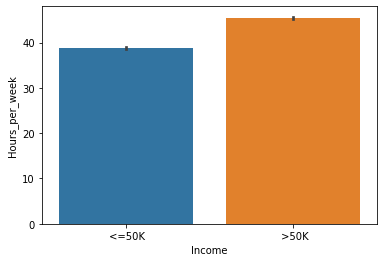

In [28]:
sns.barplot(x = 'Income', y = 'Hours_per_week', data = df)

If hours per week is less than 40 then Income will be less than 50k, If hours per week is more than 40 then Income will be more than 50k

### Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

label_list=list(df.select_dtypes(['object']).columns)
le=LabelEncoder() 
for i in label_list:
    df[i] = le.fit_transform(df[i])
    
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


This will Shuffle our dataset and it will avoid biasness of prediction

In [30]:
df = df.sample(frac=1, random_state = 0)

### Multivariate Analysis

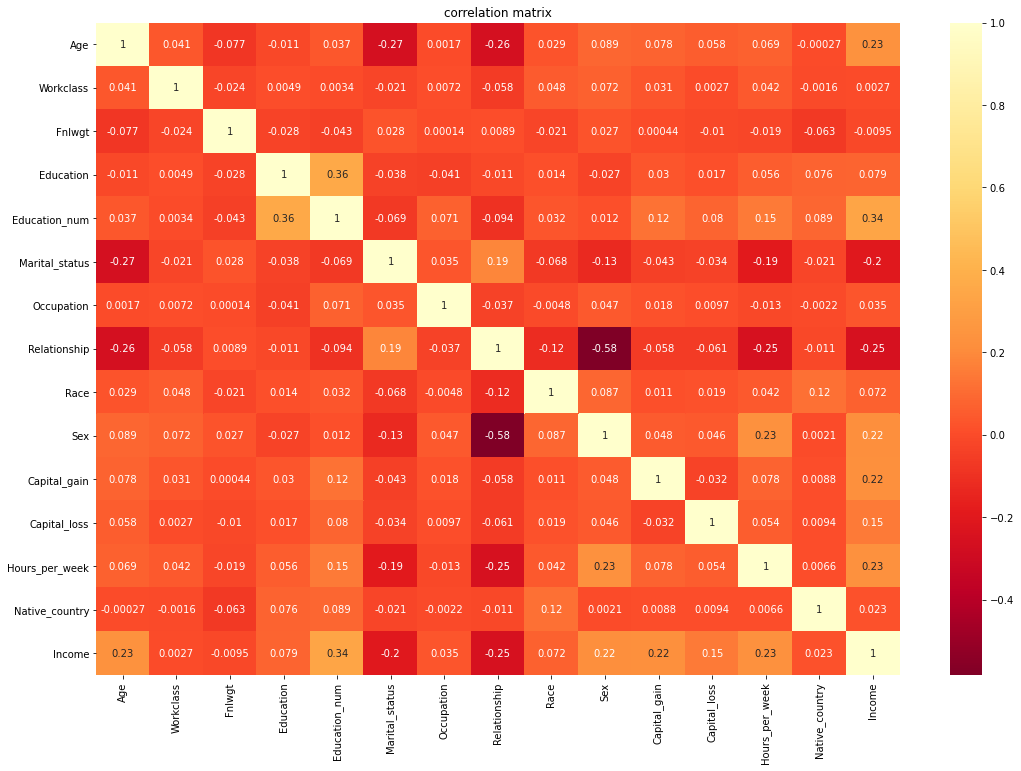

In [31]:
fig=plt.figure(figsize=(18,12))
hc=df.corr(method='pearson')
sns.heatmap(hc,cmap="YlOrRd_r",annot=True)
plt.title("correlation matrix")
plt.show()

We can clearly see that there is not much correlation, even though Education_num have heighst corelation i.e. 34%

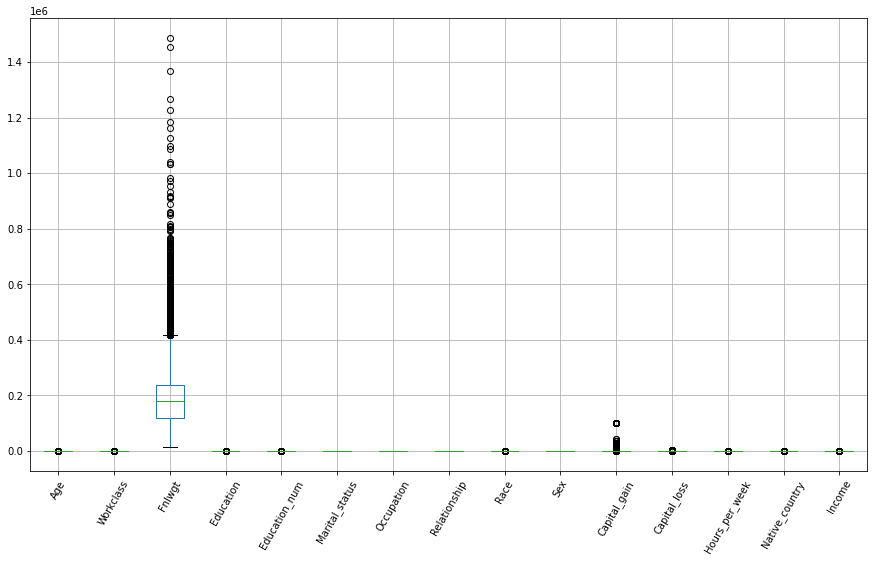

In [32]:
df.boxplot(figsize=[15,10])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=60)
plt.show()

#### Removing outlier from Data

In [33]:
z=np.abs(zscore(df))
z

array([[0.10398249, 0.81805622, 0.03545477, ..., 0.03542999, 0.26137428,
        1.77553698],
       [0.54385124, 0.08522344, 0.01662572, ..., 0.36951263, 0.26137428,
        0.5632099 ],
       [0.40919773, 0.08522344, 0.12047759, ..., 0.03542999, 4.03186012,
        0.5632099 ],
       ...,
       [0.32391687, 1.72133587, 1.15014041, ..., 0.84531523, 0.26137428,
        0.5632099 ],
       [1.28893524, 2.62461552, 1.42632365, ..., 0.77445524, 0.26137428,
        0.5632099 ],
       [0.76378562, 0.81805622, 0.75867572, ..., 0.68333818, 0.26137428,
        0.5632099 ]])

In [34]:
threashold=3
print(np.where(z>3))

(array([    2,     4,     9, ..., 32539, 32547, 32551], dtype=int64), array([13, 12,  0, ...,  8, 10,  8], dtype=int64))


In [35]:
df_new=df[(z<3).all(axis=1)]

In [36]:
df.shape

(32560, 15)

In [37]:
# Checking shape of new dataset
df_new.shape

(27770, 15)

In [38]:
# Data loss

loss_percent=(32560-27770)/32560*100
loss_percent

14.71130221130221

More than 14% of data we have to drop but this much amount of data is not good to drop.

### Splitting Data into Two parts namely X and Y

In [39]:
x = df.drop("Income", axis=1)
y = df["Income"]
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
22278,40,4,193524,15,10,2,4,0,4,1,0,0,40,38
8950,46,3,188027,15,10,4,3,4,4,0,0,0,45,38
7838,33,3,202498,5,4,5,9,1,4,1,0,0,40,12
16505,21,3,184756,15,10,4,0,3,4,0,0,0,16,38
19140,59,3,106748,5,4,2,7,5,4,0,0,0,99,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,23,3,181557,11,9,4,7,3,2,1,0,0,25,38
19648,19,3,188864,11,9,4,11,4,2,0,0,0,20,38
9845,43,5,311177,15,10,4,13,1,2,1,0,0,30,38
10799,21,6,39236,15,10,4,12,1,4,0,0,0,50,38


In [40]:
y

22278    1
8950     0
7838     0
16505    0
19140    0
        ..
13123    0
19648    0
9845     0
10799    0
2732     0
Name: Income, Length: 32560, dtype: int32

#### Transforming Data to Remove Skewness:

In [44]:
x.skew()

Age                0.558738
Workclass          0.076178
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.000536
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -4.243083
dtype: float64

In [45]:
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer() 
for i in int_list:
    if abs(x.loc[:,i].skew())>0.55:
        x.loc[:,i]=PT.fit_transform(x.loc[:,i].values.reshape(-1,1))

### Feature Scaling

In [46]:
# Machine Learning library

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,auc
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_curve,auc

In [47]:
scale = MinMaxScaler() 
new = scale.fit(x)  
scale_x = new.transform(x) 

scaled_x = pd.DataFrame(scale_x, index=x.index, columns=x.columns)
x=scaled_x
x.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
22278,0.476686,0.571429,0.336528,1.000000,0.6,0.333333,0.307692,0.0,1.0,1.0,0.0,0.0,0.397959,0.95
8950,0.561811,0.428571,0.330628,1.000000,0.6,0.666667,0.230769,0.8,1.0,0.0,0.0,0.0,0.448980,0.95
7838,0.362885,0.428571,0.345955,0.333333,0.2,0.833333,0.692308,0.2,1.0,1.0,0.0,0.0,0.397959,0.30
16505,0.110668,0.428571,0.327069,1.000000,0.6,0.666667,0.000000,0.6,1.0,0.0,0.0,0.0,0.153061,0.95
19140,0.718571,0.428571,0.228073,0.333333,0.2,0.333333,0.538462,1.0,1.0,0.0,0.0,0.0,1.000000,0.95


### Splitting the DataFrame:

#### Random State

In [48]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.8249385749385749  on Random_state  101


In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [51]:
model=[LogisticRegression(),KNeighborsClassifier(),BernoulliNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('accuracy score of ->', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validation score is - ",accuracy_score(y_test,pred)-score.mean())
    print(" ")

accuracy score of -> LogisticRegression()
0.8249385749385749
[[6988  453]
 [1257 1070]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7441
           1       0.70      0.46      0.56      2327

    accuracy                           0.82      9768
   macro avg       0.78      0.70      0.72      9768
weighted avg       0.81      0.82      0.81      9768

[0.81388206 0.81695332 0.81787469 0.81541769 0.817414  ]
0.8163083538083538
Difference between Accuracy score and cross validation score is -  0.00863022113022116
 
accuracy score of -> KNeighborsClassifier()
0.828009828009828
[[6690  751]
 [ 929 1398]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      7441
           1       0.65      0.60      0.62      2327

    accuracy                           0.83      9768
   macro avg       0.76      0.75      0.76      9768
weighted avg       0.82      0.83      0.83      9768

[0.8

Random Forest Classifier have the heighst Accuracy Score i.e. 85.87% and cross validation Score i.e. 85.06%

### Hyper Parameter Tuning

In [52]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {"max_depth":[1,2,3,4,5,6,7,8,9,10,15,20],
              "max_features": [3,5,7,9],
              "min_samples_leaf":[2,3,4,5,6]}

clf = RandomizedSearchCV(RandomForestClassifier(), parameters)
clf.fit(x_train,y_train) #fitting train and test data
clf.best_params_  #Best parameters

{'min_samples_leaf': 3, 'max_features': 5, 'max_depth': 20}

In [53]:
clf_pred=clf.best_estimator_.predict(x_test)
print(accuracy_score(y_test,clf_pred))
print(confusion_matrix(y_test,clf_pred))
print(classification_report(y_test,clf_pred))

0.8654791154791155
[[6996  445]
 [ 869 1458]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91      7441
           1       0.77      0.63      0.69      2327

    accuracy                           0.87      9768
   macro avg       0.83      0.78      0.80      9768
weighted avg       0.86      0.87      0.86      9768



### AUC ROC Curve

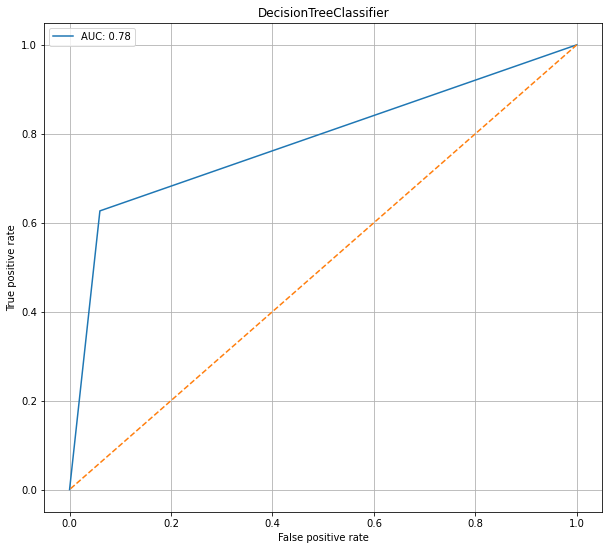

In [54]:
fpr,tpr,thresholds=roc_curve(y_test,clf_pred) # calculating fpr, tpr
rf_auc = auc(fpr, tpr) #Model Accuracy
plt.figure(figsize=(10,9)) #plotting the figure, size of 10*9
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0) #adding accuracy score at bottom right
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.grid() #adding the grid

### Model Saving:

In [55]:
import joblib
joblib.dump(clf.best_estimator_,"Census.obj")
SVR_from_joblib=joblib.load("Census.obj")
Predicted = SVR_from_joblib.predict(x_test)
Predicted

array([1, 0, 1, ..., 0, 0, 0])

In [56]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame([SVR_from_joblib.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

0     1     2     3     4     5     6     7     8     9     10    \
Predicted     1     0     1     0     0     0     0     0     0     1     0   
Original      1     0     0     0     0     0     0     0     0     1     0   

           11    12    13    14    15    16    17    18    19    20    21    \
Predicted     0     1     1     0     0     0     0     0     0     0     1   
Original      0     1     1     0     0     0     0     0     0     1     0   

           22    23    24    25    26    27    28    29    30    31    32    \
Predicted     0     0     0     0     0     0     1     1     0     0     0   
Original      0     0     0     0     0     0     1     1     0     0     0   

           33    34    35    36    37    38    39    40    41    42    43    \
Predicted     0     1     0     0     0     0     0     0     1     1     0   
Original      0     1     1     0     0     0     0     0     0     1     0   

           44    45    46    47    48    49    50    51    52    53    54    \
Predicted     0     0     0     0     0     0     0     0     0     0     0   
Original      0     0     0     0     0     0     0     0     0     0     0   

           55    56    57    58    59    60    61    62    63    64    65    \
Predicted     0     0     0     1     0     0     0     0     0     0     0   
Original      0     0     0     1     0     0     0     0     0     0     0   

           66    67    68    69    70    71    72    73    74    75    76    \
Predicted     0     0     0     0     0     1     0     0     1     0     0   
Original      0     0     0     0     0     0     0     0     1     0     0   

           77    78    79    80    81    82    83    84    85    86    87    \
Predicted     0     0     1     0     0     1     1     0     0     0     0   
Original      0     0     0     0     0     0     1     0     0     0     0   

           88    89    90    91    92    93    94    95    96    97    98    \
Predicted     0     0     0     1     0     1     0     0     0     0     0   
Original      0     0     0     1     0     1     0     0     0     0     1   

           99    100   101   102   103   104   105   106   107   108   109   \
Predicted     1     0     0     0     1     0     0     0     0     0     0   
Original      0     0     1     1     1     0     0     0     0     0     0   

           110   111   112   113   114   115   116   117   118   119   120   \
Predicted     0     0     0     0     1     0     0     1     0     0     0   
Original      0     0     0     0     1     0     1     1     0     0     0   

           121   122   123   124   125   126   127   128   129   130   131   \
Predicted     0     0     0     0     1     1     0     0     0     0     1   
Original      0     0     0     0     0     1     0     1     0     0     1   

           132   133   134   135   136   137   138   139   140   141   142   \
Predicted     0     1     0     0     0     0     0     1     0     0     0   
Original      0     1     0     0     0     0     0     0     0     0     0   

           143   144   145   146   147   148   149   150   151   152   153   \
Predicted     0     0     0     1     0     1     0     0     0     0     0   
Original      1     0     0     1     0     1     0     0     0     1     0   

           154   155   156   157   158   159   160   161   162   163   164   \
Predicted     0     1     0     0     1     0     0     1     0     0     0   
Original      0     0     0     0     1     0     0     0     1     1     0   

           165   166   167   168   169   170   171   172   173   174   175   \
Predicted     0     0     0     0     0     0     0     0     1     0     0   
Original      0     0     0     0     0     0     0     0     1     0     0   

           176   177   178   179   180   181   182   183   184   185   186   \
Predicted     1     0     0     0     0     0     0     0     0     1     0   
Original      0     0     0     0     1     0